In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [2]:
housingdf = pd.read_csv('/content/Housing.csv')

In [3]:
housingdf.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# Print a list datatypes of all columns
housingdf.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [5]:
# Convert 'finished' to 2, 'semi-furnished to 1' and 'unfurnished' to 0 in 'furnishingstatus' column
housingdf['furnishingstatus'] = housingdf['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})

# Create a new DataFrame with the modified 'furnishingstatus' column
newhousingdf = housingdf.copy(5)

# Print the new DataFrame
print(newhousingdf.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea  furnishingstatus  
0              no             yes        2      yes                 2  
1              no             yes        3       no                 2  
2              no              no        2      yes                 1  
3              no             yes        3      yes                 2  
4              no             yes        2       no                 2  


In [6]:
# X - independent variables (area, bedrooms, bathrooms, stories, and furnishingstatus)
X = newhousingdf[['area', 'bedrooms', 'bathrooms', 'stories', 'furnishingstatus']]
# Y - dependent variables (price)
Y = newhousingdf['price']

In [7]:
# Generating the training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [8]:
# Generating the Linear regression model
lrmodel = LinearRegression()
lrmodel.fit(x_train, y_train)

LinearRegression()

In [9]:
# Predict the price of a house
houseprediction = [[4850, 3, 3, 2, 1]] # semi-furnished has been assigned value 1
predictedPrice = lrmodel.predict(houseprediction)
print("Predicted price of the house:", predictedPrice)

Predicted price of the house: [6840533.03760861]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [10]:
# Predict prices of all houses in the test set and compare
y_pred = lrmodel.predict(x_test)
comparisondf = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': np.round(y_pred,2)}) # round the predicted price to 2 decimal places
print(comparisondf.head(20))

     Actual Price  Predicted Price
316       4060000       5752603.22
77        6650000       7012918.35
360       3710000       3524697.24
90        6440000       4459295.83
493       2800000       4052262.67
209       4900000       4196892.63
176       5250000       5575400.56
249       4543000       6225912.98
516       2450000       2868845.43
426       3353000       3631395.63
6        10150000       9148656.55
497       2660000       3100656.32
422       3360000       3029175.73
424       3360000       3824655.04
529       2275000       3726619.07
499       2660000       6044392.21
498       2660000       3291578.92
55        7350000       4404682.65
476       2940000       4354579.43
486       2870000       4179379.31


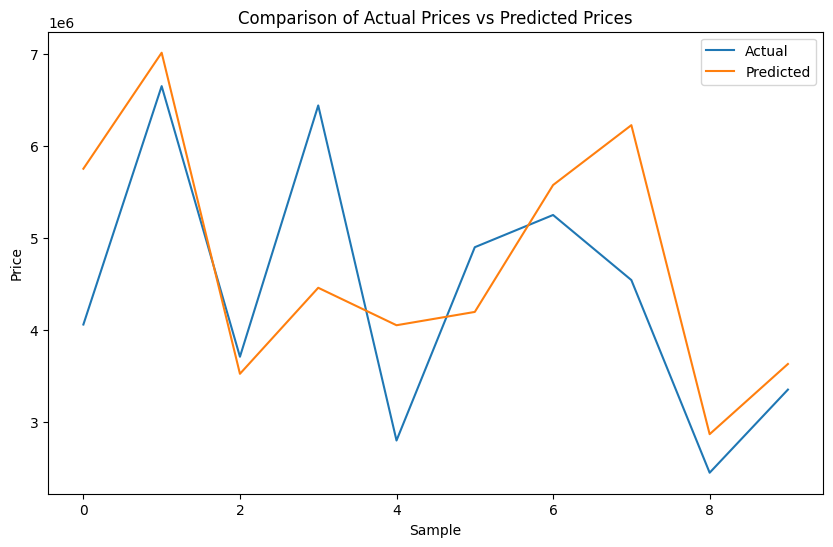

In [11]:
# Plotting comparison for first 10 test samples
# Plotting comparison for first 10 test samples
plt.figure(figsize=(10, 6))
plt.plot(range(10), comparisondf['Actual Price'][:10], label='Actual')
plt.plot(range(10), comparisondf['Predicted Price'][:10], label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Price')
plt.title('Comparison of Actual Prices vs Predicted Prices')
plt.legend()
plt.show()

In [12]:
# Calculationg the Squared Error, Mean Squared Error, Root Mean Squared Error
squarederror = np.square(y_test - y_pred)
mean_squared_error_val = mean_squared_error(y_test, y_pred)
root_mean_squared_error = np.sqrt(mean_squared_error_val)

print("Squared Error:\n",squarederror)
print("Mean Squared Error:\n", mean_squared_error_val)
print("Root Mean Squared Error:\n", root_mean_squared_error)

Squared Error:
 316    2.864906e+12
77     1.317097e+11
360    3.433711e+10
90     3.923189e+12
493    1.568162e+12
           ...     
15     1.714813e+13
357    3.554146e+12
39     7.035671e+11
54     1.798315e+12
155    2.049724e+11
Name: price, Length: 109, dtype: float64
Mean Squared Error:
 2388015835598.831
Root Mean Squared Error:
 1545320.6255010094
